#  Importing the Dependencieses


In [ ]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from tpot import TPOTClassifier



import warnings
warnings.filterwarnings("ignore")


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print (stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# Exploratory Data Analysis¶


In [ ]:
train_news = pd.read_csv(r'C:\Users\mak\Desktop\new model 3\train.csv')
train_news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
test_news = pd.read_csv(r'C:\Users\mak\Desktop\new model 3\train.csv')
test_news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_news.shape

(20800, 5)

In [ ]:
test_news.shape


(20800, 5)

- stropwords are those words which dosen't add much value to a paragraph or text can be the words such as (the, a , you , where, what ,when, etc...)



In [ ]:
train_news.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
test_news.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

# Data Pre-processing


In [ ]:
# replacing the null values with empty string
train_news = train_news.fillna(' ')
test_news = test_news.fillna(' ')

In [ ]:
# merging the author name and news title
train_news['content'] = train_news['author']+' '+train_news['title']
test_news['content'] = test_news['author']+' '+test_news['title']

In [ ]:
print(train_news['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
print(test_news['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


# Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('^a-zA-Z', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
train_news['content'] = train_news['content'].apply(stemming)
test_news['content'] = test_news['content'].apply(stemming)


In [ ]:
print(train_news['content'])

0        darrel lucu hous dem aide: didn’t even see com...
1        daniel j. flynn flynn: hillari clinton, big wo...
2                  consortiumnews.com truth might get fire
3        jessica purkiss 15 civilian kill singl us airs...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper t.i.: trump ’poster child ...
20796    benjamin hoffman n.f.l. playoffs: schedule, ma...
20797    michael j. de la merc rachel abram macy’ said ...
20798    alex ansari nato, russia hold parallel exercis...
20799                         david swanson keep f-35 aliv
Name: content, Length: 20800, dtype: object


In [ ]:
print(test_news['content'])

0        darrel lucu hous dem aide: didn’t even see com...
1        daniel j. flynn flynn: hillari clinton, big wo...
2                  consortiumnews.com truth might get fire
3        jessica purkiss 15 civilian kill singl us airs...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper t.i.: trump ’poster child ...
20796    benjamin hoffman n.f.l. playoffs: schedule, ma...
20797    michael j. de la merc rachel abram macy’ said ...
20798    alex ansari nato, russia hold parallel exercis...
20799                         david swanson keep f-35 aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = train_news['content'].values
Y = train_news['label'].values


In [ ]:
print(X)


['darrel lucu hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'
 'daniel j. flynn flynn: hillari clinton, big woman campu - breitbart'
 'consortiumnews.com truth might get fire' ...
 'michael j. de la merc rachel abram macy’ said receiv takeov approach hudson’ bay - new york time'
 'alex ansari nato, russia hold parallel exercis balkan'
 'david swanson keep f-35 aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

# Converting the Textual Data to Numerical Data


In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train_news['content'].values)
X = transformer.fit_transform(counts)

In [ ]:
Y = train_news['label'].values
test_counts = count_vectorizer.transform(test_news['content'].values)
test_tfidf = transformer.fit_transform(test_counts)

In [ ]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 417882 stored elements and shape (20800, 149830)>
  Coords	Values
  (0, 4863)	0.2165218927332343
  (0, 4864)	0.24793148653615255
  (0, 22399)	0.1981484581956435
  (0, 22406)	0.24793148653615255
  (0, 27411)	0.13156850672059783
  (0, 27477)	0.1981484581956435
  (0, 33009)	0.19360181557096778
  (0, 33010)	0.1957612804846955
  (0, 35095)	0.14597825214418644
  (0, 35099)	0.24793148653615255
  (0, 36686)	0.15975360877369998
  (0, 36696)	0.22303997236589798
  (0, 44034)	0.12432900707468589
  (0, 44092)	0.24793148653615255
  (0, 61904)	0.11915729770198633
  (0, 61944)	0.24793148653615255
  (0, 67774)	0.1321079901265965
  (0, 67778)	0.1981484581956435
  (0, 74774)	0.1559330847550666
  (0, 74796)	0.24793148653615255
  (0, 77607)	0.1957612804846955
  (0, 77614)	0.24793148653615255
  (0, 115793)	0.13747300677495586
  (0, 115804)	0.24793148653615255
  (0, 135924)	0.15884719860180038
  :	:
  (20797, 146965)	0.04889695039447585
  (20798, 

In [ ]:
X.shape

(20800, 149830)

In [ ]:
print(test_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 417882 stored elements and shape (20800, 149830)>
  Coords	Values
  (0, 4863)	0.2165218927332343
  (0, 4864)	0.24793148653615255
  (0, 22399)	0.1981484581956435
  (0, 22406)	0.24793148653615255
  (0, 27411)	0.13156850672059783
  (0, 27477)	0.1981484581956435
  (0, 33009)	0.19360181557096778
  (0, 33010)	0.1957612804846955
  (0, 35095)	0.14597825214418644
  (0, 35099)	0.24793148653615255
  (0, 36686)	0.15975360877369998
  (0, 36696)	0.22303997236589798
  (0, 44034)	0.12432900707468589
  (0, 44092)	0.24793148653615255
  (0, 61904)	0.11915729770198633
  (0, 61944)	0.24793148653615255
  (0, 67774)	0.1321079901265965
  (0, 67778)	0.1981484581956435
  (0, 74774)	0.1559330847550666
  (0, 74796)	0.24793148653615255
  (0, 77607)	0.1957612804846955
  (0, 77614)	0.24793148653615255
  (0, 115793)	0.13747300677495586
  (0, 115804)	0.24793148653615255
  (0, 135924)	0.15884719860180038
  :	:
  (20797, 146965)	0.04889695039447585
  (20798, 

In [ ]:
test_tfidf.shape

(20800, 149830)

# Spliting the data into training and testing data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)

In [ ]:
print(f"Number of Training dataset: {X_train.shape[0]}\nNumber of Testing dataset: {X_test.shape[0]}")


Number of Training dataset: 16640
Number of Testing dataset: 4160


In [ ]:
def kfolds(model, model_name):
    scores = cross_val_score(model, X, Y, cv=10)
    model_score = np.average(scores)
    print(f"{model_name} score on cross validation: {model_score * 100:.2f}%")

def train(model, model_name):
    model.fit(X_train, Y_train)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    print(f"{model_name} model score on Training data: {train_score * 100:.2f}%")
    print(f"{model_name} model score on Testing data: {test_score * 100:.2f}%")

def conf_matrix(model):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def class_report(model):
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))

def roc(model, model_name):
    Y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, color="darkorange", label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Logistic Regression


In [ ]:
log_model = LogisticRegression()
train(log_model, "Logistic Regression")

Logistic Regression model score on Training data: 99.04447115384616%
Logistic Regression model score on Testing data: 96.77884615384616%


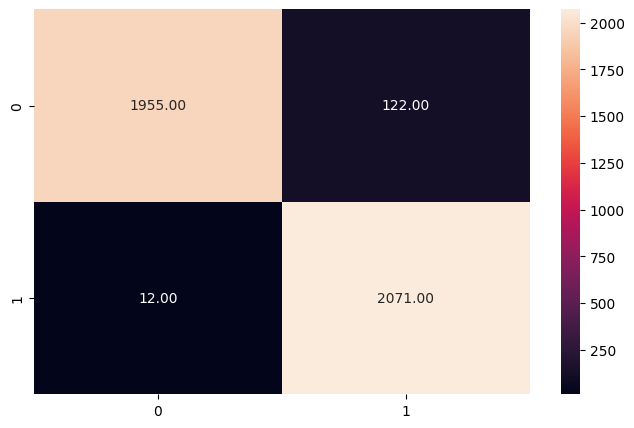

In [ ]:
conf_matrix(log_model)

In [ ]:
class_report(log_model)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2077
           1       0.94      0.99      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



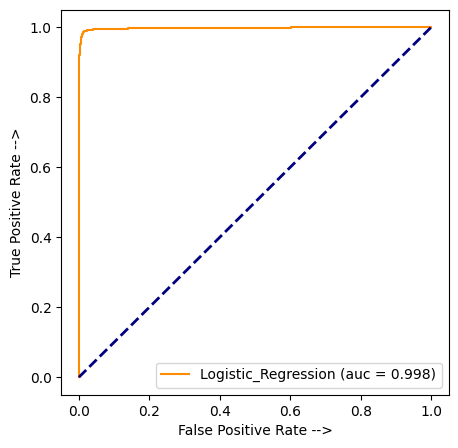

In [ ]:
roc(log_model, 'Logistic_Regression')

# Making Predictions



### Logistic Regression Prediction





In [ ]:
# Make predictions --> Logistic Regression
predictions = log_model.predict(test_tfidf)
# Submissions
test_ID = test_news.id
submission = pd.DataFrame({'id' : test_ID, 'label' : predictions})

- The submission file will consist of the ID column and a label column. We can just copy the ID column from the test file, make it a dataframe, and then add our label column.



In [ ]:
# submission = test_news.id.copy().to_frame()
# submission['prediction'] = predictions

In [ ]:
submission.head()


,id,label
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [ ]:
submission.to_csv("./Logistic Regression.csv", index=False) # Convert the submissions to .csv


In [ ]:
import pickle

# Save the trained Logistic Regression model
with open(r"C:\Users\mak\Desktop\new model 3\fake_news_model.pkl", "wb") as model_file:
    pickle.dump(log_model, model_file)

# Save the CountVectorizer
with open(r"C:\Users\mak\Desktop\new model 3\count_vectorizer.pkl", "wb") as count_vec_file:
    pickle.dump(count_vectorizer, count_vec_file)

# Save the TfidfTransformer
with open(r"C:\Users\mak\Desktop\new model 3\tfidf_transformer.pkl", "wb") as tfidf_file:
    pickle.dump(transformer, tfidf_file)





